In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [111]:
df = pd.read_csv('ab_data.csv')

In [113]:
len(df)

294478

In [115]:
total = df['user_id'].nunique()
total

290584

In [116]:
converted = df.query('converted == 1')['user_id'].nunique()
converted/total

0.12104245244060237

In [117]:
lined = df[(df['landing_page']=='new_page') & (df['group'] !='treatment')]['user_id'].nunique()
lined

1928

In [122]:
df.isna().sum().sum()

0

In [5]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df[((df['landing_page']=='new_page') & (df['group']=='treatment')) | ((df['landing_page']=='old_page') & (df['group']=='control'))]
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [123]:
df2['user_id'].nunique()

290584

In [124]:
df2['user_id'].value_counts()

773192    2
630732    1
811737    1
797392    1
795345    1
801490    1
799443    1
787157    1
793302    1
817882    1
842446    1
815835    1
805596    1
803549    1
809694    1
807647    1
895712    1
840399    1
836301    1
899810    1
834242    1
936604    1
934557    1
940702    1
938655    1
830144    1
828097    1
832195    1
838348    1
821956    1
         ..
734668    1
736717    1
730574    1
775632    1
771538    1
642451    1
773587    1
783828    1
785877    1
779734    1
781783    1
759256    1
726472    1
748999    1
746950    1
753093    1
751044    1
740803    1
738754    1
744897    1
742848    1
634271    1
632222    1
636316    1
630169    1
650647    1
648598    1
654741    1
652692    1
630836    1
Name: user_id, Length: 290584, dtype: int64

In [125]:
df2[df2['user_id']== 773192]

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,1,1
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0,1,1


In [126]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2.drop_duplicates('user_id', keep='first', inplace=True)
# Check again if the row with a duplicate user_id is deleted or not
df2[df2['user_id']== 773192]

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0,1,1


In [8]:
Pall = df[df['converted']==1].count() / df['converted'].count()

user_id         0.119659
timestamp       0.119659
group           0.119659
landing_page    0.119659
converted       0.119659
dtype: float64

In [57]:
Pcontrol = df[(df['converted']==1) & (df['group']=='control')]['converted'].count() / df[df['group']=='control']['converted'].count()
Pcontrol

0.12039917935897611

In [56]:
Ptreat = df[(df['converted']==1) & (df['group']=='treatment')]['converted'].count() / df[df['group']=='treatment']['converted'].count()
Ptreat

0.11891957956489856

In [58]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = Ptreat - Pcontrol 
obs_diff

-0.0014795997940775518

**d.** What is the probability that an individual received the new page?

In [23]:
df[df['landing_page']=='new_page']['user_id'].count() / df['user_id'].count()

0.5

## 𝐻0: 𝑝𝑜𝑙𝑑 >= 𝑝𝑛𝑒𝑤
## 𝐻1: 𝑝𝑜𝑙𝑑 < 𝑝𝑛𝑒𝑤

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [27]:
pnew = df[df['converted']==1]['converted'].count() / df['converted'].count()
pnew

0.11965919355605512

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [28]:
pold = df[df['converted']==1]['converted'].count() / df['converted'].count()
pold

0.11965919355605512

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [62]:
nnew = df2[(df2['group']=='treatment')]['converted'].count()
nnew

145311

**d.** What is $n_{old}$, the number of individuals in the control group?

In [61]:
nold = df2[(df2['group']=='control')]['converted'].count()
nold 

145274

In [66]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([1, 0], size=nnew, p=[pnew, (1-pnew)])
newmean = new_page_converted.mean()
newmean

0.12038317814893573

In [67]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([1, 0], size=nold, p=[pold, (1-pold)])
oldmean = old_page_converted.mean()
oldmean

0.11948456021036111

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [68]:
diff = newmean - oldmean
diff

0.00089861793857462513

In [47]:
# Sampling distribution 
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([1, 0], size=nnew, p=[pnew, (1-pnew)])
    old_page_converted = np.random.choice([1, 0], size=nold, p=[pold, (1-pold)])
    newmean = new_page_converted.mean()
    oldmean = old_page_converted.mean()
    diff = newmean - oldmean
    p_diffs.append(diff)


Text(0.5,1,'Differnce between new_page & old_page under the null hypothesis')

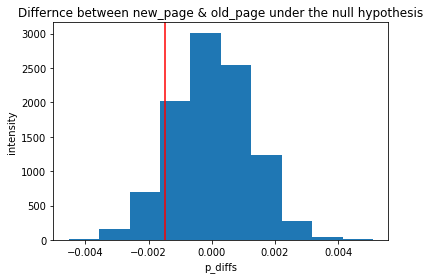

In [59]:
plt.hist(p_diffs)
plt.axvline(obs_diff, color='r')
plt.xlabel('p_diffs')
plt.ylabel('intensity')
plt.title('Differnce between new_page & old_page under the null hypothesis')

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [60]:
(p_diffs > obs_diff).mean()

0.89200000000000002

this value is called p value 
and 89.2% means we can't reject the null hypothesis
because it's bigger than alpha value of 0.05
so there's isn't enough evidence to prove that the new page is definitely better

In [76]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2.query('converted == 1 & landing_page =="old_page"'))

# number of conversions with the new_page
convert_new = len(df2.query('converted == 1 & landing_page =="new_page"'))

# number of individuals who were shown the old_page
n_old = len(df2.query('landing_page =="old_page"'))

# number of individuals who received new_page
n_new = len(df2.query('landing_page =="new_page"'))

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145311)

In [81]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.31160753391 0.905173705141


The Z score is smaller than Z alpha score for right tailed 
1.311 < 1.645
which means we fail to reject the null
And The p-value is similar to the one calculated earlier in part K we agree with the last part with failing to reject the null hypothesis


>**Best type of regression in this case is logistic regression.**

In [90]:
df2['intercept']=1
df2[['ab_pager','ab_page']] = pd.get_dummies(df2['group'])
df2.drop('ab_pager', axis=1, inplace=True)
df2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#i

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


In [91]:
logm = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
res = logm.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


In [93]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-12-24 23:22 AIC:              212780.6032
No. Observations:   290585           BIC:              212801.7625
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290583           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3116  0.1897  -0.0374   0.0074
==================================================================

"""

p-value for ab_page is equal to 0.1897
because in part II we used the z test for one-sided hypothesis while we use two-sided hypthesis in here
and the current p-value compared to the type I error means there's no statistical significance for this variable
so we have the same result failing to reject the null hypothesis

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It's sometimes a good idea to consider other factors as long as they might have statistical significance to the desired output which can help find the real predictor of our output.

there's some disadvantages, it makes the model interpreted differently because of the change in R squared value
& it increases complexity of the model. 

In [94]:
# Read the countries.csv
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [101]:
# Join with the df2 dataframe
df2.set_index('user_id')
df_merged = df2.merge(countries, on='user_id', how='left')

In [107]:
# Create the necessary dummy variables
df_merged[['CA', 'UK', 'US']] = pd.get_dummies(df_merged['country']) 
df_merged.tail()

logm2 = sm.Logit(df_merged['converted'], df_merged[['intercept','ab_page', 'US', 'UK']])
res2 = logm2.fit()
res2.summary2()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-12-24 23:47 AIC:              212781.3782
No. Observations:   290585           BIC:              212823.6968
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2486  0.0000  -2.0822  -1.9778
ab_page       -0.0150    0.0114   -1.3076  0.1910  -0.0374   0.0075
US             0.0408    0.0269    1.5159  0.1296  -0.0119   0.0934
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
==================================================================

"""

The countries don't affect the page convertion rate in all three countries CA, UK & US.
As all of these p-values are larger than error rate value (alpha)


In [109]:
# making new interaction columns
df_merged['USpage'] = df_merged['US']*df_merged['ab_page']
df_merged['UKpage'] = df_merged['UK']*df_merged['ab_page']

In [110]:
# Fit your model, and summarize the results
logm3 = sm.Logit(df_merged['converted'], df_merged[['intercept','ab_page', 'US', 'UK', 'USpage', 'UKpage']])
res3 = logm3.fit()
res3.summary2()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-12-24 23:52 AIC:              212782.9124
No. Observations:   290585           BIC:              212846.3903
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
USpage         0.0469    0.0538    0.8716  0.3834  -0.0585   0.1523
UKpage         0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

The interaction between countries and new_page landing page isn't statistically significant so it doesn't affect convertion ratio in all three cases of CA, UK & US.

Using the last two parts, we can determine that we fail to reject the null hypothesis,
and since the sample size in this dataset is big we can assume safely that it's recommended to create another new_page.

These results can change if we study them under the effect of time because of the bias of users favoriting the old page at first but then realizing later that the new page is better.


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])